In [1]:
import os
import pandas as pd

data_dir = "round-4-island-data-bottle"
df_dict = {}

for filename in os.listdir(data_dir):
    if "nn" not in filename:
        print(f"Reading {filename}...")
        df_dict[filename] = pd.read_csv(os.path.join(data_dir, filename), delimiter=";")

Reading prices_round_4_day_1.csv...
Reading prices_round_4_day_2.csv...
Reading prices_round_4_day_3.csv...


C:\Users\cyunkeat\AppData\Local\Temp\ipykernel_27012\2676706558.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coconut_df["timestamp"] = coconut_df["timestamp"] + (idx * 1000000)
C:\Users\cyunkeat\AppData\Local\Temp\ipykernel_27012\2676706558.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coupon_df["timestamp"] = coupon_df["timestamp"] + (idx * 1000000)
C:\Users\cyunkeat\AppData\Local\Temp\ipykernel_27012\2676706558.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

Mean of COCONUT mid_price: 9999.900983333333, std of COCONUT mid_price: 88.75414439509082
Mean of COCONUT_COUPON mid_price: 635.0464333333333, std of COCONUT_COUPON mid_price: 46.59395107902735


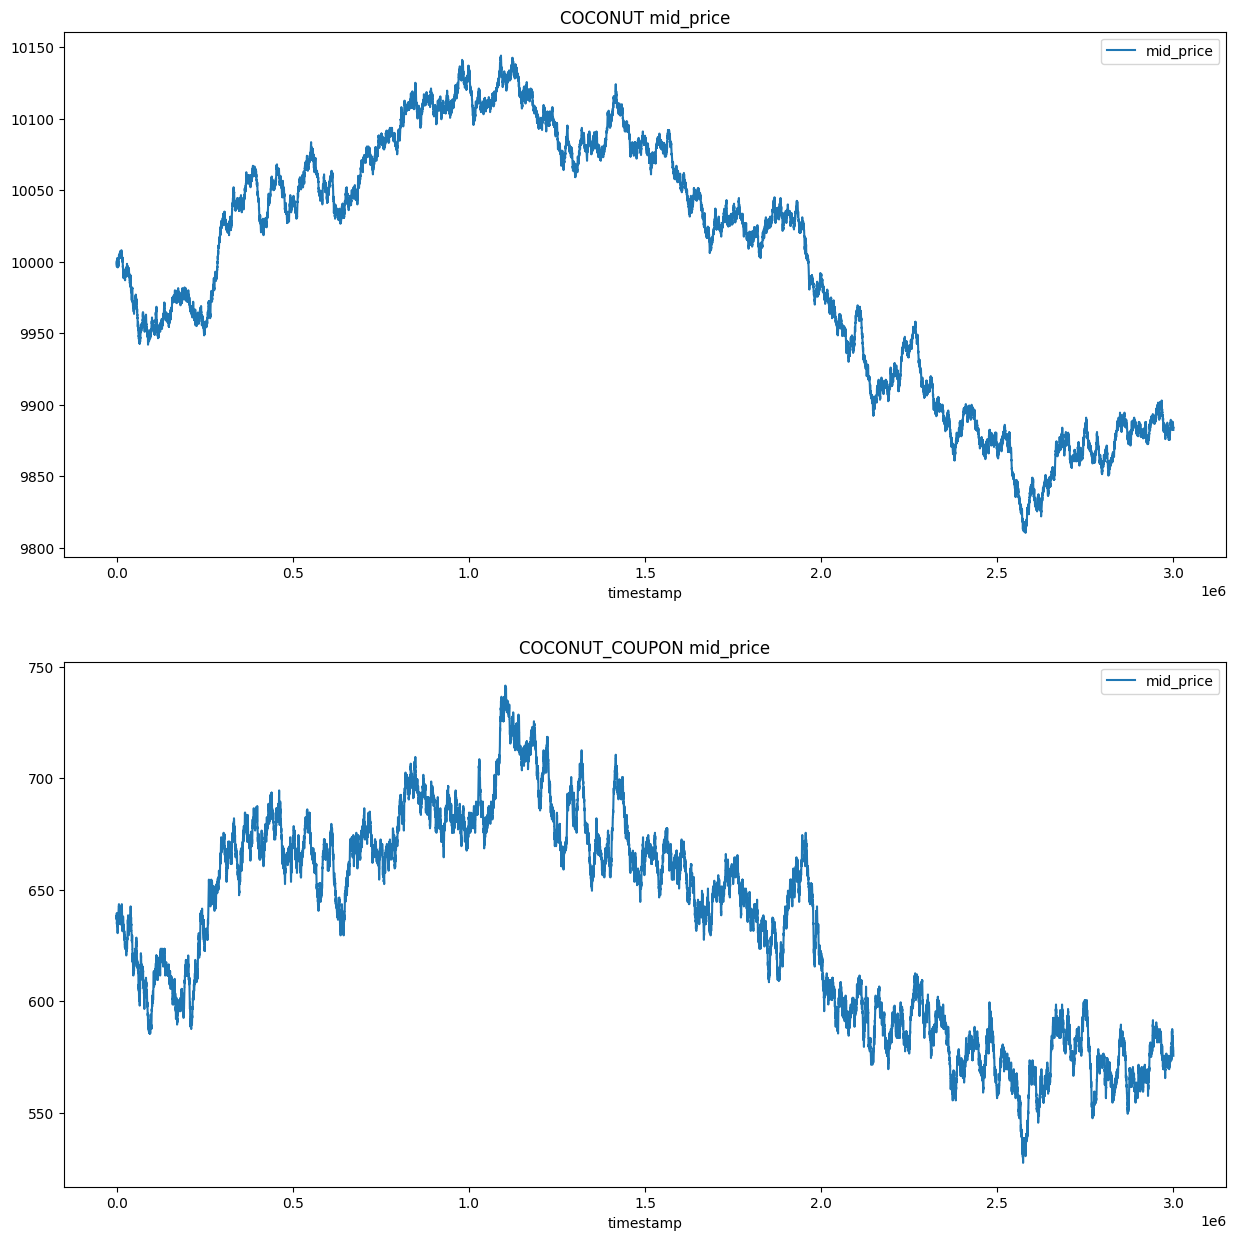

In [2]:
import matplotlib.pyplot as plt

filenames = ["prices_round_4_day_1.csv", "prices_round_4_day_2.csv", "prices_round_4_day_3.csv"]
total_coconut_df = None
total_coupon_df = None

figs, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

for idx, filename in enumerate(filenames):
    df = df_dict[filename]

    coconut_df = df[df["product"] == "COCONUT"]
    coupon_df = df[df["product"] == "COCONUT_COUPON"]
    
    if total_coconut_df is None:
        total_coconut_df = coconut_df
        total_coupon_df = coupon_df
    else:
        coconut_df["timestamp"] = coconut_df["timestamp"] + (idx * 1000000)
        coupon_df["timestamp"] = coupon_df["timestamp"] + (idx * 1000000)

        total_coconut_df = pd.concat([total_coconut_df, coconut_df], ignore_index=True)
        total_coupon_df = pd.concat([total_coupon_df, coupon_df], ignore_index=True)

total_coconut_df.plot(x="timestamp", y="mid_price", title="COCONUT mid_price", ax=axes[0])
total_coupon_df.plot(x="timestamp", y="mid_price",title="COCONUT_COUPON mid_price", ax=axes[1])

print(f"Mean of COCONUT mid_price: {total_coconut_df["mid_price"].mean()}, std of COCONUT mid_price: {total_coconut_df["mid_price"].std()}")
print(f"Mean of COCONUT_COUPON mid_price: {total_coupon_df["mid_price"].mean()}, std of COCONUT_COUPON mid_price: {total_coupon_df["mid_price"].std()}")

In [63]:
import numpy as np
import statistics

def compute_black_scholes(asset_price, asset_volatility):
    strike_price = 10000.0
    time_to_expiration = 250.0 # Unit is years, 252 trading days in a year
    r = 0

    norm = statistics.NormalDist()

    d1 = (np.log(asset_price/strike_price) + (r + asset_volatility**2/2)*time_to_expiration) / (asset_volatility*np.sqrt(time_to_expiration))
    d2 = d1 - asset_volatility * np.sqrt(time_to_expiration)
    
    return asset_price * norm.cdf(d1) - strike_price * np.exp(-r*time_to_expiration) * norm.cdf(d2)

print(compute_black_scholes(10000, 0.01011932923))

0.08000032189979472 -0.0800003218997947
-9999.468118499977
1.0
0.4681184999768615
637.6300004627701
